<a href="https://colab.research.google.com/github/OmWadhwani/Deep-learning-projects/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O train.zip "https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=1"
!unzip train.zip -d train


--2025-03-22 04:11:46--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=1 [following]
--2025-03-22 04:11:47--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6a966f7a0b85cd4f7acabad89a.dl.dropboxusercontent.com/cd/0/inline/CmWF8UehPvFMxDQ-N_ocDtybTjdEATSkvPa_HV9EO6QH0alo6_9U4hdssdNdGATgJ1aKABwRETlSetAcN0c70kEyXjcHPYMLX7Msq2ckp5ZYLDLWFeYTh1ddb5EnAt_dgKl8DSEaVvgrrqZD1jxvRAzV/file?dl=1# [following]
--2025-03-22 04:11:47--  https://uc6a966f7a0b85cd4f7acabad89a.dl.dropboxusercontent.com/cd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications.mobilenet import MobileNet ,preprocess_input
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.regularizers import l2

from keras.preprocessing.image import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
base_model = MobileNet(input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False



x = Flatten()(base_model.output)
x = Dense(units = 7, activation='softmax')(x)
model = Model(base_model.input, x)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,580,103 (13.66 MB)

 Trainable params: 351,239 (1.34 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = train_datagen.flow_from_directory(directory=
    '/content/train/train',
    target_size=(224,224),
    batch_size=32,
)

Found 350 images belonging to 7 classes.


In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1/255
)
val_data=  val_datagen.flow_from_directory(directory=
    '/content/train/train',
    target_size=(224,224),
    batch_size=32,
)

Found 350 images belonging to 7 classes.


In [ ]:
print(train_data.class_indices)


{'Angry': 0, 'Disguist': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


In [ ]:
# t_img, label = next(train_data)

# def plot_images(img_ary, label):
#   count =0
#   plt.imshow(im)
#   plt.title(im.shape)
#   plt.axis =False
#   plt.show()

#   count+=1
#   if count  ==0 :
#     break
# plot_images(t_img, label)

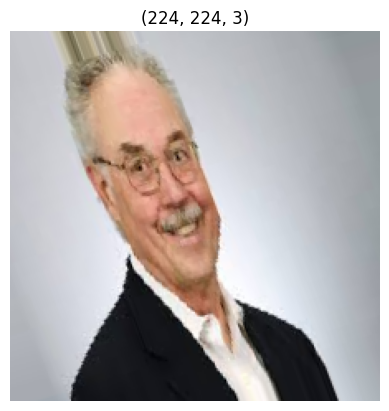

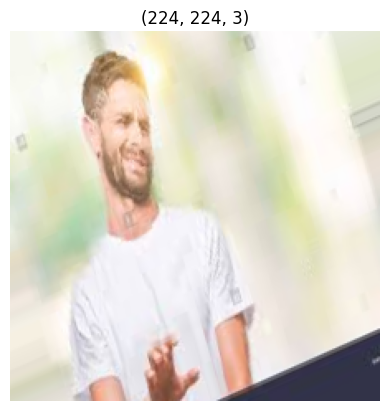

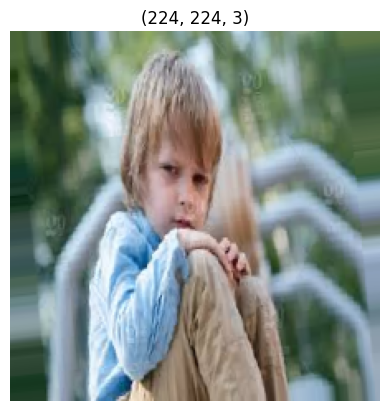

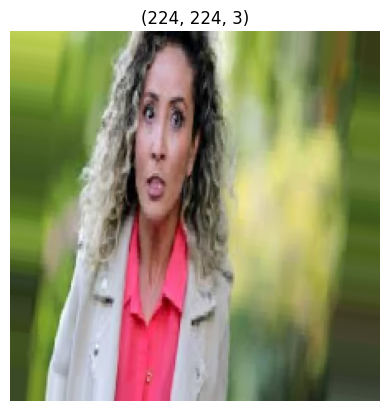

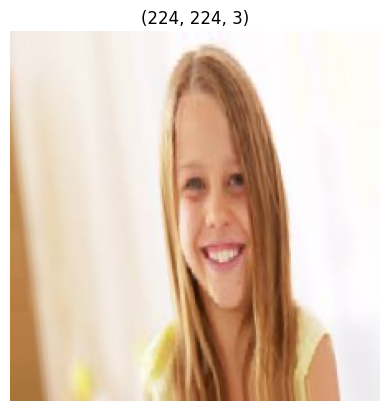

In [ ]:
import matplotlib.pyplot as plt

# Fetch a batch of images (Correct way)
t_img, label = next(train_data)  # Corrected `.next()` usage

# Function to plot images
def plot_images(img_ary, label):
  count =0
  for im, l in zip(img_ary, label):  # Show up to 5 images
        # plt.figure(figsize=(2, 2))
        plt.imshow(im)  # Correct image reference
        plt.title(im.shape)
        plt.axis('off')  # Correct axis removal
        plt.show()

        count+=1
        if count  ==5 :
          break

# Plot images
plot_images(t_img, label)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

# Change the file extension from .h5 to .keras
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# Define callbacks
call_back = [es, mc]


In [ ]:
hist = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,
    validation_steps=8,
    callbacks=[es, mc]
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1243 - loss: 9.6454
Epoch 1: val_accuracy improved from -inf to 0.38281, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.1285 - loss: 9.7079 - val_accuracy: 0.3828 - val_loss: 5.0905
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.2812 - loss: 6.9948

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.38281
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 516ms/step - accuracy: 0.2812 - loss: 6.9948 - val_accuracy: 0.3404 - val_loss: 6.5588
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4246 - loss: 5.4195
Epoch 3: val_accuracy improved from 0.38281 to 0.75000, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.4294 - loss: 5.3444 - val_accuracy: 0.7500 - val_loss: 1.2507
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7500 - loss: 1.2098
Epoch 4: val_accuracy improved from 0.75000 to 0.75532, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 483ms/step - accuracy: 0.7500 - loss: 1.2098 - val_accuracy: 0.7553 - val_loss: 1.5084
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7471 - loss: 1.5063
Epoch 5: val_accuracy did not improve from 0.75532
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.7441 - loss: 1.5414 - val_accuracy: 0.7500 - val_loss: 1.4194
Epoch

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.models import load_model
model = load_model("/content/best_model.keras")

In [ ]:
h = hist.history
print(h.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


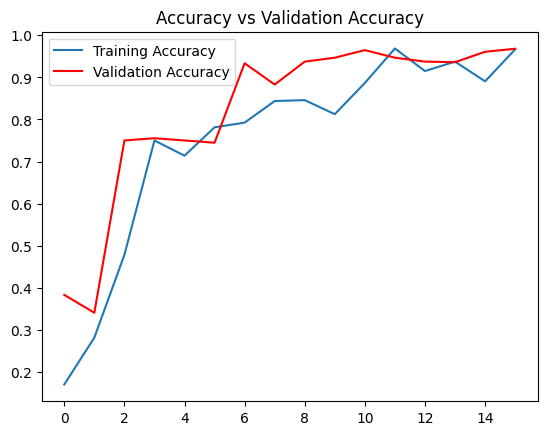

In [ ]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy vs Validation Accuracy')
plt.legend()
plt.show()


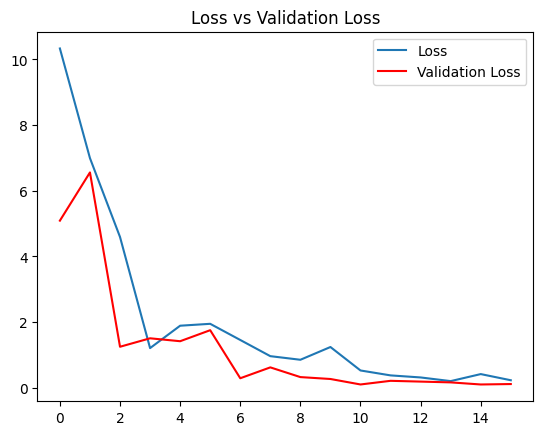

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['loss'], label='Loss')
plt.plot(h['val_loss'], label='Validation Loss', c='red')
plt.title('Loss vs Validation Loss')
plt.legend()  # To show the labels
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


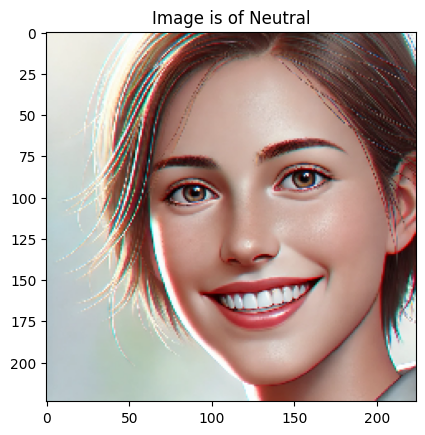

In [ ]:
img= "/content/DALL·E 2025-03-11 19.45.50 - A realistic digital painting of a happy person smiling warmly. Their eyes are bright, and their expression is full of joy and positivity. Their face i.webp"
img = load_img(img, target_size=(224,224))
i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
plt.imshow(input_arr[0])
op = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))
plt.title(f"Image is of {op[pred]}")
plt.show()

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=call_back)

# Get final validation accuracy
val_acc = max(history.history['val_accuracy'])  # Between 0 and 1
print(f"Best Validation Accuracy: {val_acc:.4f}")  # Print with 4 decimal places


NameError: name 'x_train' is not defined